In [ ]:
## Notebook to download pedestrain crossing images from wms server using gpkg file

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from owslib.wms import WebMapService
import io
%matplotlib inline

In [5]:
crossings = gpd.read_file('klinj_suojatie.gpkg')

In [6]:
type(crossings)

geopandas.geodataframe.GeoDataFrame

In [7]:
crossings.shape

(1393, 7)

In [8]:
crossings.head(10)

,gml_id,id,vaylatyyppi,luokka,featurecode,html_color,geometry
0,klinj_suojatie.16704,None,Suojatie,Suojatiet,12,400040,"LINESTRING (25497295.968 6672929.268, 25497296..."
1,klinj_suojatie.16713,None,Suojatie,Suojatiet,12,400040,"LINESTRING (25497172.202 6673374.486, 25497179..."
2,klinj_suojatie.16741,None,Suojatie,Suojatiet,12,400040,"LINESTRING (25497334.310 6672931.001, 25497334..."
3,klinj_suojatie.16908,None,Suojatie,Suojatiet,12,400040,"LINESTRING (25497361.189 6672770.811, 25497354..."
4,klinj_suojatie.16910,None,Suojatie,Suojatiet,12,400040,"LINESTRING (25497350.873 6672758.490, 25497343..."
5,klinj_suojatie.16918,None,Suojatie,Suojatiet,12,400040,"LINESTRING (25497557.692 6672778.966, 25497551..."
6,klinj_suojatie.16927,None,Suojatie,Suojatiet,12,400040,"LINESTRING (25497343.618 6672721.533, 25497337..."
7,klinj_suojatie.16937,None,Suojatie,Suojatiet,12,400040,"LINESTRING (25497337.003 6672718.985, 25497342..."
8,klinj_suojatie.16945,None,Suojatie,Suojatiet,12,400040,"LINESTRING (25497080.546 6673181.265, 25497072..."
9,klinj_suojatie.16946,None,Suojatie,Suojatiet,12,400040,"LINESTRING (25497102.037 6673239.147, 25497095..."


In [9]:
crossings.geometry.name

'geometry'

In [10]:
crossings.crs

{'init': 'epsg:3879'}

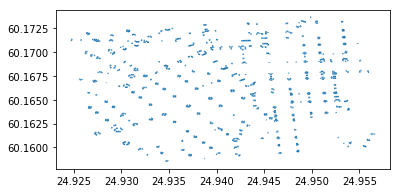

In [11]:
crossings.to_crs(epsg=4326).plot()  # change crs type 

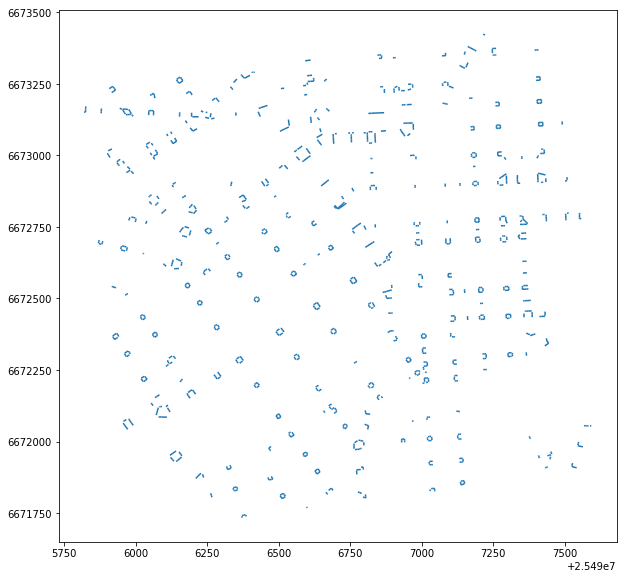

In [12]:
crossings['geometry'].plot(figsize=(10,10)) # original crs 

In [13]:
## xy attriute of geometry object returns the coordinate of geometric shape. In our case, its linestring
coordinates = crossings['geometry'].apply(lambda p : p.xy)

In [14]:
coordinates[0] 

(array('d', [25497295.9682035, 25497296.3567031]),
 array('d', [6672929.268, 6672912.646]))

In [15]:
### we can also get boudingbox using  'bounds' method 
coordinate_bounds = crossings['geometry'].bounds
coordinate_bounds.head()

,minx,miny,maxx,maxy
0,2.549730e+07,6672912.646,2.549730e+07,6672929.268
1,2.549717e+07,6673370.764,2.549718e+07,6673374.486
2,2.549733e+07,6672914.920,2.549733e+07,6672931.001
3,2.549735e+07,6672770.811,2.549736e+07,6672776.495
4,2.549734e+07,6672758.490,2.549735e+07,6672759.135


###  Get images 

In [16]:
coordinate_bounds.shape

(1393, 4)

In [17]:
coordinate_bounds.shape[0]

1393

In [18]:
#!mkdir ./new_images # folder to have all images 

In [19]:
wms = WebMapService('https://kartta.hel.fi/ws/geoserver/avoindata/wms',version='1.3.0')

In [45]:
for i in range(coordinate_bounds.shape[0]):
    img = wms.getmap(layers=['avoindata:Ortoilmakuva_2019_5cm'],
                         
                        srs='EPSG:3879',
                        bbox=coordinate_bounds.iloc[i], #Value is minx,miny,maxx,maxy in units of the SRS.
                        size=(50, 50),
                       format='image/png',
                     transparent = True
                         )
    out = open('../autoencoders/fifty_reso_data/'+str(i)+'.png', 'wb')
    out.write(img.read())
    out.close()

    #image = io.BytesIO(img.read())
    #data = plt.imread(image)
    #img = io.BytesIO(img)
    #im_array = np.array(img, dtype='uint8')
    #im_array = im_array / 255.0
    #X[i] = data
    
    